# In this notebook, we get a feel for the course evaluation data that we scraped in courseEvaluationsScrapeAndClean.ipynb

### As a brief summary of what follows, we look at:
- Whether "features" are correlated with one another or independent
- Which features correlate with high student satisfaction
- Whether the aforementioned correlations change with class size and class type (i.e.lab vs. lower-division lecture vs. upper-division lecture)
- The **principle components** of the data.  These turn out to have intuitive interpretations.

In [1]:
import pandas as pd
import seaborn as sns
from pylab import *
%matplotlib inline

/Users/cwylie/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('cleanedDF.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1021
Data columns (total 14 columns):
Instructor          1022 non-null object
Enroll              1022 non-null int64
Rcmnd_Class         1022 non-null float64
Rcmnd_Instructor    1022 non-null float64
Study_Hrs_Per_Wk    1022 non-null float64
Grade_Expected      1010 non-null float64
Grade               785 non-null float64
Link                1022 non-null object
Course_Code         1022 non-null object
Course_Title        1022 non-null object
Course_Type         1022 non-null object
Quarter             1022 non-null object
Year                1022 non-null int64
Attendance          1022 non-null float64
dtypes: float64(6), int64(2), object(6)
memory usage: 119.8+ KB


In [4]:
dfMissing = df[pd.isnull(df.Grade_Expected)]
df = df[pd.notnull(df.Grade_Expected)]

In [5]:
df = df.reset_index(drop=True)   # Nice 0,1,2,... with no gaps due to nulls removed

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 14 columns):
Instructor          1010 non-null object
Enroll              1010 non-null int64
Rcmnd_Class         1010 non-null float64
Rcmnd_Instructor    1010 non-null float64
Study_Hrs_Per_Wk    1010 non-null float64
Grade_Expected      1010 non-null float64
Grade               785 non-null float64
Link                1010 non-null object
Course_Code         1010 non-null object
Course_Title        1010 non-null object
Course_Type         1010 non-null object
Quarter             1010 non-null object
Year                1010 non-null int64
Attendance          1010 non-null float64
dtypes: float64(6), int64(2), object(6)
memory usage: 118.4+ KB


# Look below- that's me!
### In 2008 I won a "UCSD Teaching Fellows Award", which entailed:
- The opportunity to "solo teach" a course (though I did have my own TA)
- Lots of workshops / training
- A nice cash prize

#### This is a summary of my evaluations.  For more details, you can click on the Link column.  You can see that:
- Attendance was good (45/57 = 79%)
- 100% recommended me as an instructor
- 86% recommended the class (Physics 1B is for students in life-sciences)

In [7]:
df[df.Instructor=='Wylie, Christopher Scott']

,Instructor,Enroll,Rcmnd_Class,Rcmnd_Instructor,Study_Hrs_Per_Wk,Grade_Expected,Grade,Link,Course_Code,Course_Title,Course_Type,Quarter,Year,Attendance
904,"Wylie, Christopher Scott",57,86.4,100,6.37,3.36,NaN,https://cape.ucsd.edu/scripts/detailedStats.as...,1B,Electricity and Magnetism,Lower_Division,Summer,2008,0.789474


# Basic summary statistics
### A few interesting aspects:
- classes and instructors are both reasonably highly recommended (mean $\approx$ 80%)
- students study about6 hrs/week
- attendance is poor (mean $\approx$ 44%)

In [8]:
df.describe()

,Enroll,Rcmnd_Class,Rcmnd_Instructor,Study_Hrs_Per_Wk,Grade_Expected,Grade,Year,Attendance
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,785.000000,1010.000000,1010.000000
mean,107.769307,79.966139,78.412178,6.128020,3.369436,3.089860,2011.348515,0.439165
std,121.673177,16.782753,20.687476,2.464695,0.306059,0.308103,2.225477,0.170449
min,1.000000,0.000000,0.000000,0.500000,2.000000,2.020000,2007.000000,0.000000
25%,22.000000,71.400000,66.700000,4.477500,3.162500,2.860000,2010.000000,0.333333
50%,50.000000,82.200000,83.300000,5.880000,3.350000,3.090000,2011.000000,0.418768
75%,176.750000,92.225000,95.775000,7.525000,3.570000,3.340000,2013.000000,0.518110
max,840.000000,100.000000,100.000000,20.500000,4.000000,3.930000,2015.000000,1.000000


## There are 8 quantitative "variables".  Let's take a look at them.

In [9]:
qFeatures = list(df.describe().columns)
#qFeatures.remove('Year')

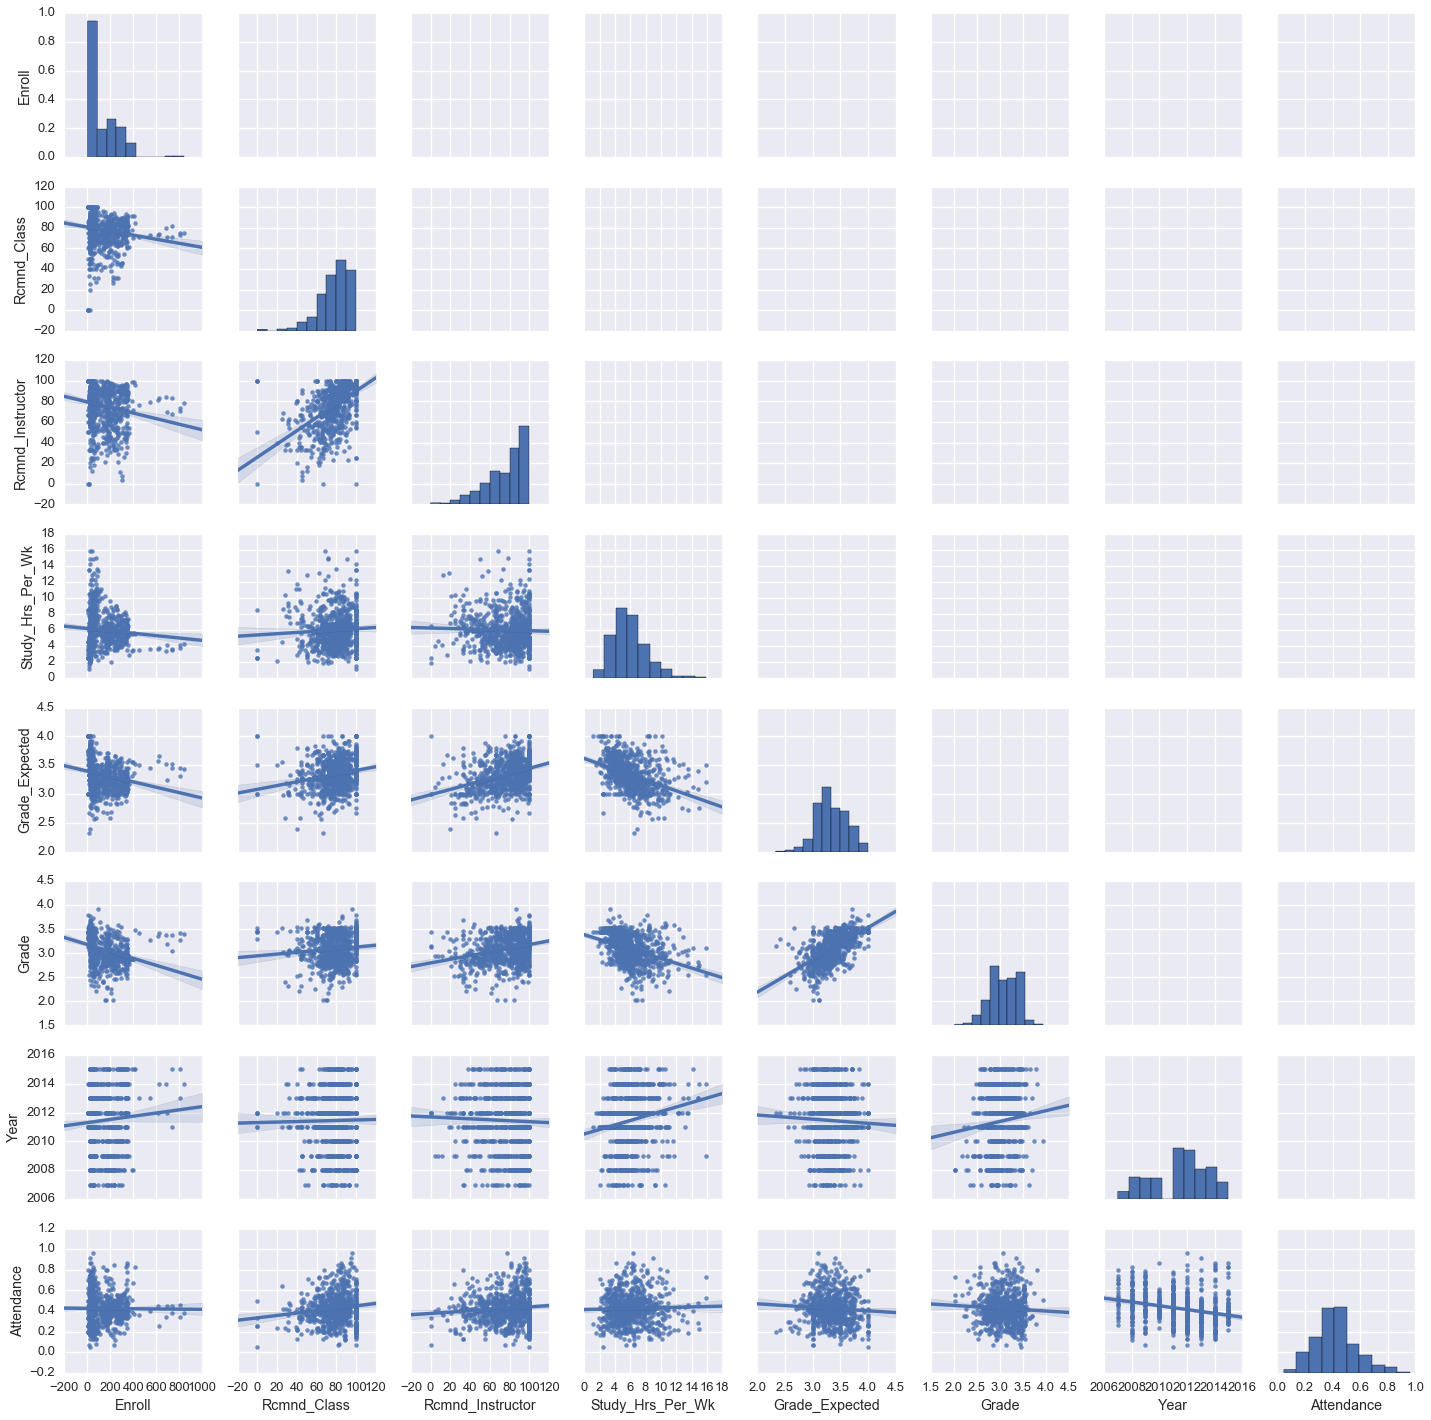

In [10]:
sns.set_context('talk')  # increases font size a bit.  downside: a bit crowded sometimes
g = sns.PairGrid(df[qFeatures].dropna())
g.map_diag(hist)
g.map_lower(sns.regplot)

# The scatterplot above is great, but I had to throw out *all* rows with missing data.  
### Below, I plot the same thing and just omit the grade column.  Grade is correlated with Expected_Grade anyway.

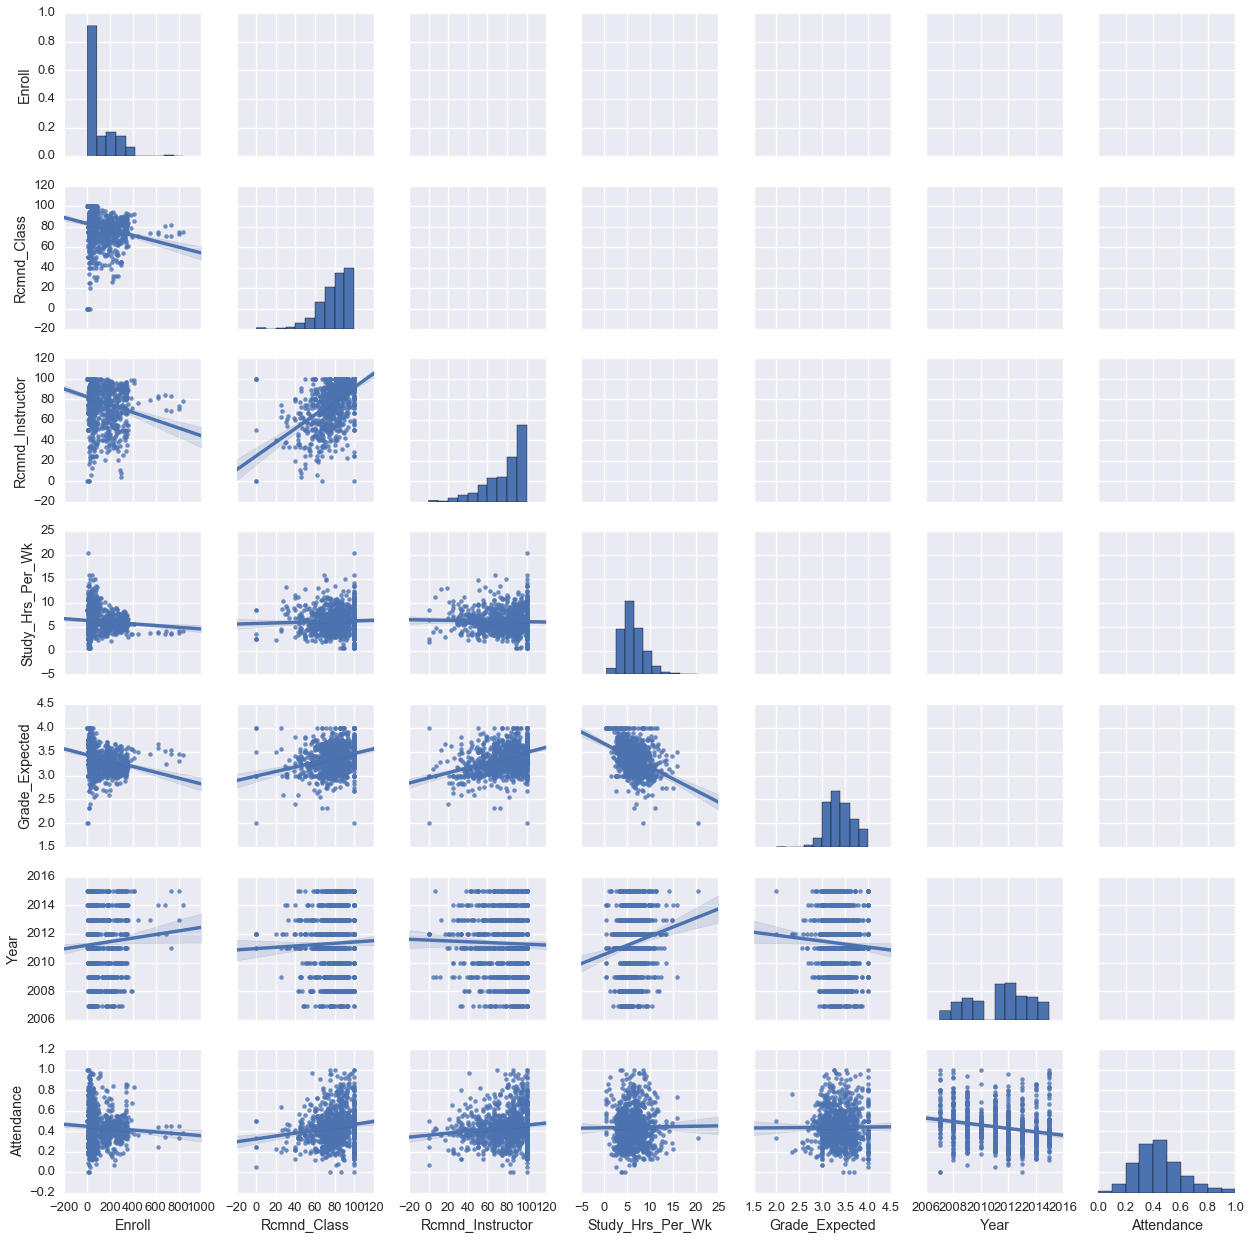

In [11]:
minQfeatures = list(qFeatures)
minQfeatures.remove('Grade')
g = sns.PairGrid(df[minQfeatures].dropna())
g.map_diag(hist)
g.map_lower(sns.regplot)

# What can we learn from the scatterplot matrix?
### (note: dropped rows with any missing data... wasn't really my intension, but was the only way to get the seaborn plot to work)
- There are a lot of very small classes.  Otherwise, class-size distribution has a "normal looking" bump and a long tail.  Should experiment with throwing out very small courses.  Or better yet, weigh recommendations by \#students
- The Rcmnd_Instructor distribution looks bimodal (monotonic increase overlaid with a bump).
- The (expected) grade distribution might be bi-modal too, but hard to say.
- strong correlation b/w good classes and good instructors: unsurprising.
- Strong correlation b/w expected and actual grades: unsurprising.
- Working hard is anticorrelated with good grades.  Clearly, the inherent difficulty of the course (not directly measured) is the real driving factor... if we could somehow control for this, hard work should result in high grades (**Simpson's paradox** is evident already!)
- Students recommend classes/courses where they expect to get a good grade (students value grades over learning?).

## Those are some strong-looking trendlines across time (Year).  Let's do a "smell test" by looking at violin plots to see if those trends are believable
- The increasing trend in enrollment seems driven by outliers
- Grades don't really seem to be going down
- Study hours might slightly be increasing
- Attendance does seem to be going down

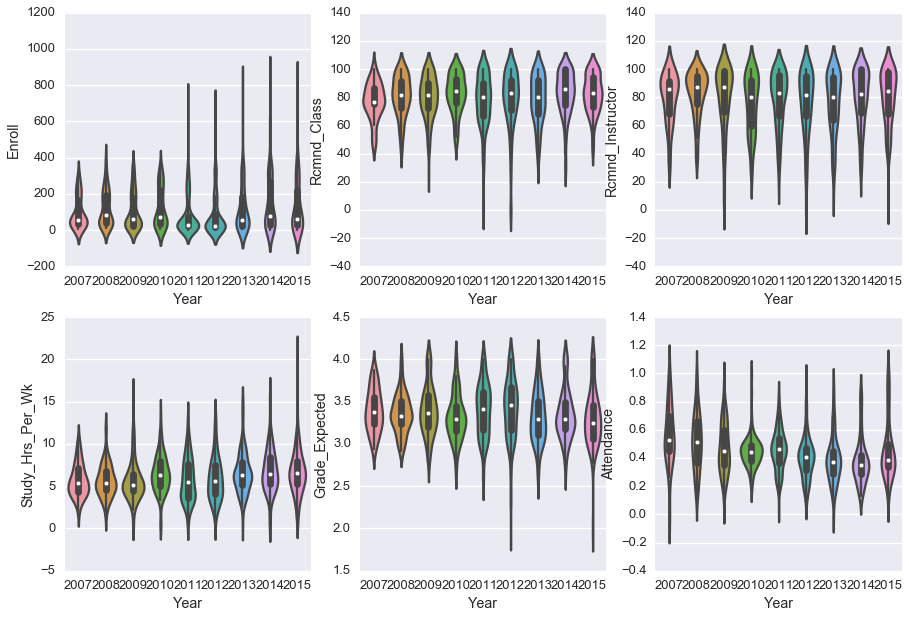

In [12]:
tempFeatures = list(minQfeatures)
tempFeatures.remove('Year')
figure(figsize=(15,10))
for i in range(6):
    subplot(2,3,i+1)
    sns.violinplot(x="Year", y=tempFeatures[i], data=df)

## Let's focus on how the success metrics depend on the features
### Lower division, upper division, and lab courses often show markedly different trends:
- Upper division classes really suffer when they become too big.  Lower/lab classes: no big effect.
- Students do not mind studying a lot in lecture classes (upper or lower), but they do in labs.
- Student evaluations are more tighly linked to grades in lower division and lab classes than in upper division classes.
- Mathematically, different slopes point to correlations between the Course_Type variable and the feature on the x-axis

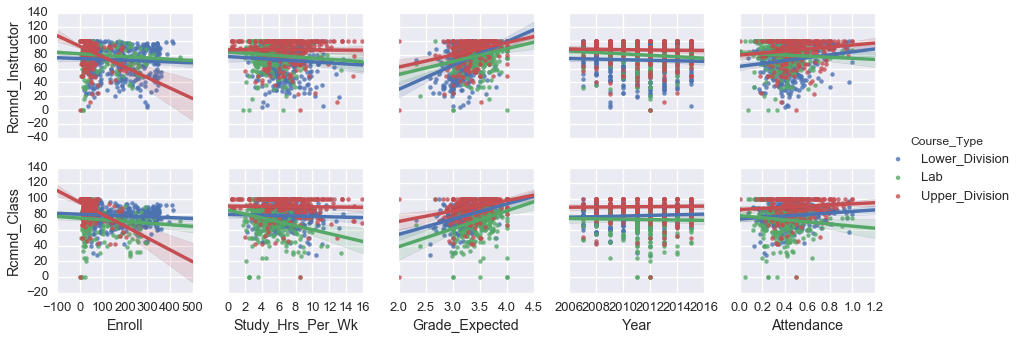

In [13]:
x = list(qFeatures)
x.remove('Rcmnd_Instructor')
x.remove('Rcmnd_Class')
x.remove('Grade')
g = sns.PairGrid(df, x_vars=x, y_vars=['Rcmnd_Instructor','Rcmnd_Class'],hue='Course_Type')
g.map(sns.regplot)
g.add_legend()

## Earlier I noted that the Enrollment distribution looks possibly bimodal.  Let's see if different class sizes paint different pictures:

Make a new column that quickly tells us whether a course is in the top 25%, bottom 25%, or middle 50% of enrollment size.  (There's probably a smarter way to do this using groupby...)

In [14]:
cutSM = df.Enroll.quantile(0.25)
cutML = df.Enroll.quantile(0.75)
def smallMedLarge(enroll):
    if enroll < cutSM:
        return 'small'
    elif enroll < cutML:
        return 'medium'
    else:
        return 'large'
df['Rough_Size'] = df.Enroll.apply(smallMedLarge)
print cutSM, cutML

22.0 176.75


### Now let's replot the "success metrics" while conditioning on class size instead of Course_Type...

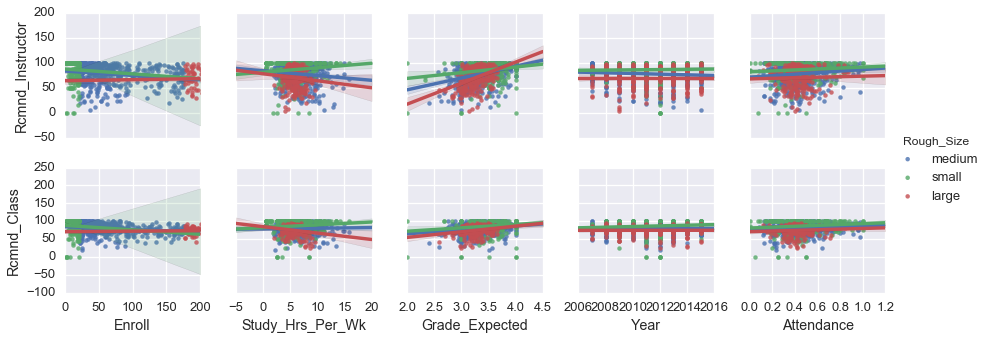

In [15]:
g = sns.PairGrid(df, x_vars=x, y_vars=['Rcmnd_Instructor','Rcmnd_Class'], hue='Rough_Size')
g.map(sns.regplot)
g.add_legend()

## What can we learn here?
#### red = large (>175), blue = medium (>22), green = small (<22)
- In small classes, students don't mind doing lots of work
- In small classes, satisfaction is less tied to grade.  In fact, students *don't* like small classes that give high grades. 
- Mathematically, with regard to satisfaction, there are interactions between class size and (1) hours worked and (2) grades.  This should be noted when considering regression techniques.

#### These observations are redolent of the previous ones re: effect of Course_Type.  This prompts the question: is Below, we see that Enrollment is clearly larger in lower division lectures classes.  Therefore, we will have to be careful teasing apart the effects of 'Course_Type' and 'Enroll'.

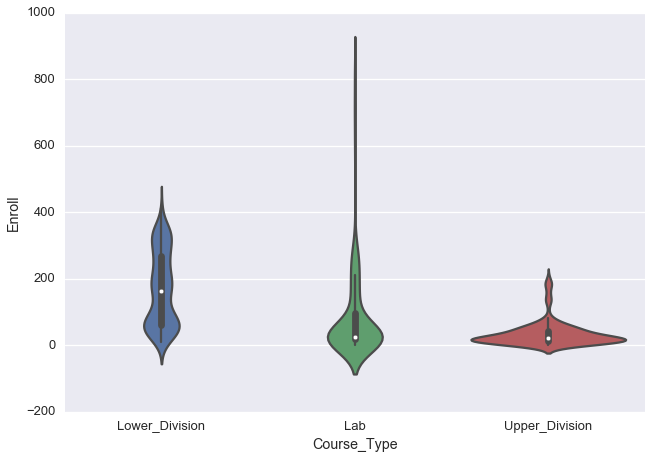

In [16]:
sns.violinplot(x='Course_Type', y='Enroll', data=df)

In [17]:
from sklearn.decomposition import PCA

In [18]:
list(qFeatures)

['Enroll',
 'Rcmnd_Class',
 'Rcmnd_Instructor',
 'Study_Hrs_Per_Wk',
 'Grade_Expected',
 'Grade',
 'Year',
 'Attendance']

### Now we're thinking about Rcmnd_Class and Rcmnd_Instructor as labels, not features

In [19]:
featureNames = ['Enroll', 'Study_Hrs_Per_Wk', 'Grade_Expected', 'Attendance']
df[featureNames].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Enroll              1010 non-null int64
Study_Hrs_Per_Wk    1010 non-null float64
Grade_Expected      1010 non-null float64
Attendance          1010 non-null float64
dtypes: float64(3), int64(1)
memory usage: 39.5 KB


In [20]:
features = df[featureNames]
target = df.Rcmnd_Instructor

### PCA is sensitive to the the data's units/scale.  Best to standardize first:

In [21]:
def standardize(ser):
    m = ser.mean()
    s = ser.std()
    ser = (ser - m)/s
    return ser
features = features.apply(standardize)
target = (target - target.mean()) / target.std()

### pca is an object containing information about the transformation (it doesn't contain the transformed data)

In [22]:
pca = PCA().fit(features)

###  Here, PCA doesn't really help in terms of dimensionality reduction, because the variance explained is fairly even across principle components.  

In [23]:
pca.explained_variance_ratio_

array([ 0.3569378 ,  0.27821004,  0.24138561,  0.12346655])

### We think of the matrix below as the "power spectrum" of the principle components onto the the original ones. (note: each row sums to 1)

In [24]:
print pca.components_**2

[[ 0.08694819  0.37519076  0.53617418  0.00168687]
 [ 0.55905267  0.2057987   0.00263613  0.2325125 ]
 [ 0.16726544  0.06013604  0.00800777  0.76459074]
 [ 0.18673369  0.3588745   0.45318191  0.00120989]]


### Now we get to the data expressed in terms of the principle components

In [25]:
pcaFeatures=pca.transform(features)

In [26]:
pcaFeatures[:,2]

array([-0.67401376, -0.91878946,  2.21759657, ..., -0.22538875,
        0.79261526,  0.63214234])

### Let's add the pc's to df as columns

In [27]:
pcNames = ['pc_'+str(i+1) for i in range(len(pcaFeatures[0]))]
df = pd.concat([df, pd.DataFrame(pcaFeatures,columns=pcNames)], axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 19 columns):
Instructor          1010 non-null object
Enroll              1010 non-null int64
Rcmnd_Class         1010 non-null float64
Rcmnd_Instructor    1010 non-null float64
Study_Hrs_Per_Wk    1010 non-null float64
Grade_Expected      1010 non-null float64
Grade               785 non-null float64
Link                1010 non-null object
Course_Code         1010 non-null object
Course_Title        1010 non-null object
Course_Type         1010 non-null object
Quarter             1010 non-null object
Year                1010 non-null int64
Attendance          1010 non-null float64
Rough_Size          1010 non-null object
pc_1                1010 non-null float64
pc_2                1010 non-null float64
pc_3                1010 non-null float64
pc_4                1010 non-null float64
dtypes: float64(10), int64(2), object(7)
memory usage: 157.8+ KB


### See below... pca.components * features = PC, i.e the matrix below maps feature space into PC space when it multiplies on the left.  This means that rows give the recipe for each PC in terms of the features:
- PC1, i.e. **"Bruisers"**: Big classes; hard work; terrible grades; bad attendance
- PC2, i.e. **"Gems"**: Tiny classes; hard work; average grades, good attendance
- PC3, i.e. **"Be there or be square"**: Huge classes; little work; bad grades; high attendance
- PC4, i.e. **"Disasters"**: Small classes; no work; terrible grades; average attendance

In [29]:
featureNames

['Enroll', 'Study_Hrs_Per_Wk', 'Grade_Expected', 'Attendance']

In [30]:
pca.components_

array([[ 0.29486979,  0.61252817, -0.73223916, -0.04107149],
       [-0.74769825,  0.45365042,  0.05134326,  0.4821955 ],
       [ 0.40898098, -0.24522651, -0.08948617,  0.8744088 ],
       [-0.43212694, -0.59906135, -0.67318787, -0.03478353]])

# Now we can easily identify a few examplars of each PC:

## first, the "bruisers" (36% of variance): tons of work, tend to be big and not recommended
#### Also, I observe that there's a mixer of upper and lower level courses here.

In [31]:
df.sort_values(by='pc_1', ascending=False).head(10)

,Instructor,Enroll,Rcmnd_Class,Rcmnd_Instructor,Study_Hrs_Per_Wk,Grade_Expected,Grade,Link,Course_Code,Course_Title,Course_Type,Quarter,Year,Attendance,Rough_Size,pc_1,pc_2,pc_3,pc_4
66,"Hwa, Terence T.",3,100.0,100.0,20.50,2.00,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,176,Quantitative Molecular Biology,Upper_Division,Winter,2015,0.333333,small,6.619675,2.759995,-1.924634,-0.087401
90,"Dubin, Daniel Herschel",72,71.4,78.6,14.96,2.75,2.76,https://cape.ucsd.edu/responses/CAPEReport.asp...,105A,Mathematical&Computatnl Phy I,Upper_Division,Fall,2014,0.222222,medium,3.642505,1.127777,-1.930789,-0.612898
477,"Hwa, Terence T.",2,0.0,0.0,8.50,2.00,NaN,https://cape.ucsd.edu/scripts/detailedStats.as...,176,Quantitative Molecular Biology,Upper_Division,Winter,2012,0.500000,small,3.594840,1.028923,0.120960,2.798823
349,"Manohar, Aneesh Vasant",17,72.7,72.7,11.23,2.33,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,4C,Phys Majrs-Elect & Magnetism,Lower_Division,Fall,2012,0.764706,small,3.456354,2.243434,1.161222,1.302139
249,"Grohs, Evan B",81,80.0,73.3,13.57,2.73,2.79,https://cape.ucsd.edu/responses/CAPEReport.asp...,2A,Physics-Mechanics,Lower_Division,Summer,2013,0.185185,medium,3.375646,0.708496,-1.946392,-0.255463
363,"Uttayarat, Patipan",81,72.0,52.0,12.74,2.75,3.03,https://cape.ucsd.edu/scripts/detailedStats.as...,2B,Phys-Electricity and Magnetism,Lower_Division,Summer,2012,0.308642,medium,3.091776,0.908338,-1.236319,-0.122911
279,"Schoetz, Eva-Maria",194,42.9,46.4,9.63,2.59,2.54,https://cape.ucsd.edu/responses/CAPEReport.asp...,2D,Phys-Relativity&Quantm Physics,Lower_Division,Spring,2013,0.288660,large,2.980337,-0.441857,-0.602788,0.587676
379,"Uttayarat, Patipan",77,27.8,33.3,10.39,2.59,2.41,https://cape.ucsd.edu/scripts/detailedStats.as...,2A,Physics-Mechanics,Lower_Division,Summer,2012,0.233766,medium,2.898896,0.261716,-1.353284,0.829685
202,"Dubin, Daniel Herschel",49,71.4,50.0,14.81,3.08,2.71,https://cape.ucsd.edu/responses/CAPEReport.asp...,105A,Mathematical&Computatnl Phy I,Upper_Division,Fall,2013,0.285714,medium,2.744672,1.476483,-1.763943,-1.233557
365,"Anderson, Michael G.",89,30.8,57.7,13.38,3.04,2.96,https://cape.ucsd.edu/scripts/detailedStats.as...,2CL,"Phys Lab-Elec,Magnetsm,Wav,Opt",Lab,Summer,2012,0.292135,medium,2.580377,0.978926,-1.442579,-0.941375


## Next, the "gems" (28% of variance): tend to be recommended, small, and intense.
#### I also observe that they tend to be upper level, i.e. course # >100

In [32]:
df.sort_values(by='pc_2', ascending=False).head(10)

,Instructor,Enroll,Rcmnd_Class,Rcmnd_Instructor,Study_Hrs_Per_Wk,Grade_Expected,Grade,Link,Course_Code,Course_Title,Course_Type,Quarter,Year,Attendance,Rough_Size,pc_1,pc_2,pc_3,pc_4
773,"Broida, Joel Gary",41,69.0,67.9,15.88,3.21,2.55,https://cape.ucsd.edu/scripts/detailedStats.as...,130B,Quantum Physics,Upper_Division,Fall,2009,0.731707,medium,2.572713,3.006100,0.352659,-1.842169
32,"Jun, Suckjoon",1,100.0,100.0,8.50,4.00,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,177,Physics of the Cell,Upper_Division,Spring,2015,1.000000,small,-1.313013,2.785068,2.097855,-1.698729
66,"Hwa, Terence T.",3,100.0,100.0,20.50,2.00,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,176,Quantitative Molecular Biology,Upper_Division,Winter,2015,0.333333,small,6.619675,2.759995,-1.924634,-0.087401
169,"Dubin, Daniel Herschel",19,100.0,100.0,15.83,3.50,3.11,https://cape.ucsd.edu/responses/CAPEReport.asp...,105B,Mathematical&Computatnl Phy II,Upper_Division,Winter,2014,0.526316,small,1.862644,2.599692,-0.854773,-2.347832
208,"Burgasser, Adam Jonathan",16,100.0,100.0,9.79,3.15,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,160,Stellar Astrophysics,Upper_Division,Fall,2013,0.875000,small,1.107655,2.434113,1.627195,-0.170433
2,"Allen, Grant",39,97.4,100.0,8.61,3.54,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,1B,Electricity and Magnetism,Lower_Division,Summer,2015,0.974359,medium,-0.086867,2.422094,2.217597,-0.843405
288,"Murphy, Thomas",18,93.3,86.7,9.70,3.79,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,120B,Physical Measurements,Upper_Division,Winter,2013,0.833333,small,-0.431009,2.394747,1.241996,-1.554859
290,"McGreevy, John A.",22,95.0,95.0,8.92,3.41,3.35,https://cape.ucsd.edu/responses/CAPEReport.asp...,130C,Quantum Physics III,Upper_Division,Winter,2013,0.909091,medium,0.275724,2.377169,1.832792,-0.559118
12,"Allen, Grant",46,75.0,90.9,8.59,3.37,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,1B,Electricity and Magnetism,Lower_Division,Summer,2015,0.956522,medium,0.336145,2.296417,2.201315,-0.485844
828,"Driscoll, Charles F.",42,81.8,93.9,10.80,3.59,3.31,https://cape.ucsd.edu/scripts/detailedStats.as...,120A,Physical Measurements,Upper_Division,Spring,2009,0.785714,medium,0.390496,2.281465,1.027411,-1.457835


## "Be there or be square": 24% of variance.   High attendance is the signature feature (75% of the power), followed by large class size

In [33]:
df.sort_values(by='pc_3', ascending=False).head(20)

,Instructor,Enroll,Rcmnd_Class,Rcmnd_Instructor,Study_Hrs_Per_Wk,Grade_Expected,Grade,Link,Course_Code,Course_Title,Course_Type,Quarter,Year,Attendance,Rough_Size,pc_1,pc_2,pc_3,pc_4
190,"Sharma, Vivek A.",343,85.2,81.1,6.25,3.07,2.89,https://cape.ucsd.edu/responses/CAPEReport.asp...,2A,Physics-Mechanics,Lower_Division,Winter,2014,0.865889,large,1.213954,-0.266112,3.055209,-0.293542
39,"Paddock, Mark",412,85.1,96.2,5.50,3.52,3.48,https://cape.ucsd.edu/responses/CAPEReport.asp...,1C,"Waves, Optics & Modern Physics",Lower_Division,Spring,2015,0.830097,large,0.126793,-0.853936,3.046574,-1.338791
189,"Sharma, Vivek A.",349,86.3,81.6,6.46,3.21,2.89,https://cape.ucsd.edu/responses/CAPEReport.asp...,2A,Physics-Mechanics,Lower_Division,Winter,2014,0.848138,large,0.950016,-0.291063,2.922483,-0.670205
914,"Kishimoto, Chad T.",10,80.0,70.0,3.50,3.25,NaN,https://cape.ucsd.edu/scripts/detailedStats.as...,7,Introductory Astronomy,Lower_Division,Summer,2008,1.000000,small,-0.739450,1.683648,2.844872,1.134243
191,"Sharma, Vivek A.",338,86.6,81.2,6.17,3.18,2.89,https://cape.ucsd.edu/responses/CAPEReport.asp...,2A,Physics-Mechanics,Lower_Division,Winter,2014,0.828402,large,0.927816,-0.337707,2.821891,-0.490638
997,"Orin, Adam Edward",19,75.0,86.7,3.83,3.53,NaN,https://cape.ucsd.edu/scripts/detailedStats.as...,1BL,Electricity & Magnetism Lab,Lab,Summer,2007,1.000000,small,-1.305520,1.736053,2.760423,0.406201
7,"Allen, Grant",116,89.4,85.8,7.62,3.30,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,2C,"Physics-Flu,Wav,Thrmdyn,Optics",Lower_Division,Summer,2015,0.974138,medium,0.427950,1.725813,2.643956,-0.348314
214,"Groisman, Alexander",803,74.8,70.5,4.08,3.31,3.27,https://cape.ucsd.edu/responses/CAPEReport.asp...,1AL,Mechanics Laboratory,Lab,Fall,2013,0.454545,large,1.314379,-4.615704,2.636934,-1.843761
598,"Paddock, Mark",344,84.9,95.8,5.19,3.44,3.19,https://cape.ucsd.edu/scripts/detailedStats.as...,1C,"Waves, Optics & Modern Physics",Lower_Division,Spring,2011,0.779070,large,0.088650,-0.650900,2.610467,-0.835563
684,"Dudko, Olga",4,100.0,100.0,6.50,3.25,NaN,https://cape.ucsd.edu/scripts/detailedStats.as...,172,Biophysics of Molecules,Upper_Division,Fall,2010,1.000000,small,-0.008428,2.272697,2.526217,0.426381


## And, finally, the "disasters" (terrible grades, little work put in): 12% of variance
#### Also, I observe a tendency toward lower division lab courses.  

In [34]:
df.sort_values(by='pc_4', ascending=False).head(10)

,Instructor,Enroll,Rcmnd_Class,Rcmnd_Instructor,Study_Hrs_Per_Wk,Grade_Expected,Grade,Link,Course_Code,Course_Title,Course_Type,Quarter,Year,Attendance,Rough_Size,pc_1,pc_2,pc_3,pc_4
610,"Anderson, Michael G.",12,100.0,100.0,2.50,2.67,3.52,https://cape.ucsd.edu/scripts/detailedStats.as...,1CL,"Waves,Optics&Modrn Phys Lab",Lab,Spring,2011,0.250000,small,0.585232,-0.731734,-0.726859,2.798979
477,"Hwa, Terence T.",2,0.0,0.0,8.50,2.00,NaN,https://cape.ucsd.edu/scripts/detailedStats.as...,176,Quantitative Molecular Biology,Upper_Division,Winter,2012,0.500000,small,3.594840,1.028923,0.120960,2.798823
340,"Groisman, Alexander",15,66.7,66.7,6.50,2.33,3.15,https://cape.ucsd.edu/responses/CAPEReport.asp...,1BL,Electricity & Magnetism Lab,Lab,Fall,2012,0.200000,small,2.412075,-0.212417,-1.271850,2.574142
410,"Anderson, Michael G.",23,40.0,20.0,6.90,2.40,3.29,https://cape.ucsd.edu/scripts/detailedStats.as...,1BL,Electricity & Magnetism Lab,Lab,Spring,2012,0.217391,medium,2.359207,-0.127012,-1.216007,2.290990
53,"Grinstein, Benjamin",12,88.9,88.9,1.39,3.00,NaN,https://cape.ucsd.edu/responses/CAPEReport.asp...,87,Freshman Seminar,Upper_Division,Spring,2015,0.750000,small,-0.600624,0.533809,1.852116,2.240891
447,"Anderson, Michael G.",4,0.0,100.0,2.50,3.00,3.45,https://cape.ucsd.edu/scripts/detailedStats.as...,1CL,"Waves,Optics&Modrn Phys Lab",Lab,Spring,2012,0.250000,small,-0.223673,-0.627213,-0.850235,2.101545
572,"Manohar, Aneesh Vasant",16,100.0,80.0,5.30,2.67,NaN,https://cape.ucsd.edu/scripts/detailedStats.as...,154,Elementary Particle Physics,Upper_Division,Spring,2011,0.312500,small,1.275724,-0.064136,-0.671374,2.091459
433,"Anderson, Michael G.",3,100.0,100.0,2.50,3.00,3.45,https://cape.ucsd.edu/scripts/detailedStats.as...,1CL,"Waves,Optics&Modrn Phys Lab",Lab,Spring,2012,0.333333,small,-0.246176,-0.385320,-0.426093,2.088091
445,"Anderson, Michael G.",3,0.0,0.0,2.50,3.00,3.45,https://cape.ucsd.edu/scripts/detailedStats.as...,1CL,"Waves,Optics&Modrn Phys Lab",Lab,Spring,2012,0.333333,small,-0.246176,-0.385320,-0.426093,2.088091
418,"Anderson, Michael G.",5,50.0,50.0,2.50,3.00,3.45,https://cape.ucsd.edu/scripts/detailedStats.as...,1CL,"Waves,Optics&Modrn Phys Lab",Lab,Spring,2012,0.400000,small,-0.257393,-0.209012,-0.077368,2.067383


# Last but not least: what about me?  
#### ... Roughly even split between "gem" and "be there or be square"

In [35]:
df[df.Instructor=='Wylie, Christopher Scott']

,Instructor,Enroll,Rcmnd_Class,Rcmnd_Instructor,Study_Hrs_Per_Wk,Grade_Expected,Grade,Link,Course_Code,Course_Title,Course_Type,Quarter,Year,Attendance,Rough_Size,pc_1,pc_2,pc_3,pc_4
904,"Wylie, Christopher Scott",57,86.4,100,6.37,3.36,NaN,https://cape.ucsd.edu/scripts/detailedStats.as...,1B,Electricity and Magnetism,Lower_Division,Summer,2008,0.789474,medium,-0.124736,1.345956,1.60513,0.070761


### Here's a grahical look at the first two PC's, overlaid with Rcmnd_Instructor in color.  Bad classes have high PC1 (bruisers) and low PC2 (gems)

(-3, 3)

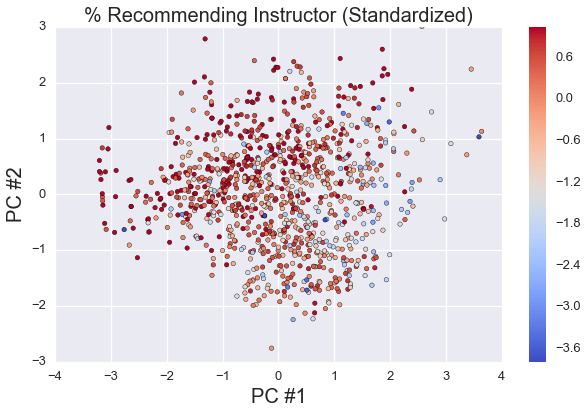

In [36]:
figure(figsize=(10,6))
scatter(df.pc_1, df.pc_2,c=target, cmap=cm.coolwarm)
colorbar()
title('% Recommending Instructor (Standardized)')
xlabel('PC #1')
ylabel('PC #2')
gca().title.set_fontsize(20)
gca().xaxis.label.set_fontsize(20)
gca().yaxis.label.set_fontsize(20)
xlim([-4,4])
ylim([-3,3])

### Here's the pairwise scatterplot in PC space.  Features are orthogonal, as PC's must be.  Also as expected, we can see that the width of the histograms decreases for higher order PC's.  

### On the bottom row, we see how good of a predictor of Rcmnd_Instructor each PC is. 

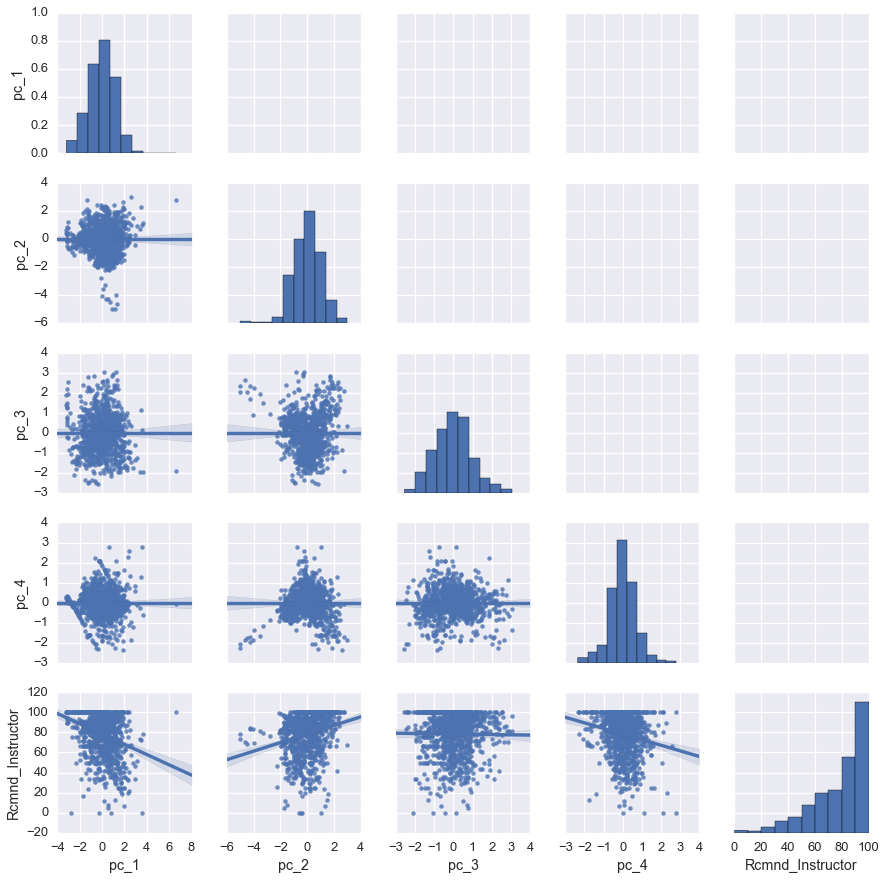

In [37]:
g = sns.PairGrid(df[['pc_1', 'pc_2', 'pc_3', 'pc_4','Rcmnd_Instructor']])
g.map_diag(hist)
g.map_lower(sns.regplot)

In [38]:
df.to_csv("cleanDFwithPCA.csv")